In [183]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [55]:
data = pd.read_csv('profiles.csv')

In [58]:
os.makedirs('dataset', exist_ok=True)
data.to_feather('dataset/profile-raw')

In [128]:
data = pd.read_feather('dataset/profile-raw')

In [129]:
data.head(2)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,None,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single


In [130]:
len(data)

59946

In [131]:
data.describe()

,age,height,income
count,5994600.0%,5994300.0%,5994600.0%
mean,3234.0%,6829.5%,2003322.3%
std,945.3%,399.5%,9734619.2%
min,1800.0%,100.0%,-100.0%
25%,2600.0%,6600.0%,-100.0%
50%,3000.0%,6800.0%,-100.0%
75%,3700.0%,7100.0%,-100.0%
max,11000.0%,9500.0%,100000000.0%


In [132]:
sorted(data.isnull().sum()/len(data))

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.0045040536482834e-05,
 0.0008340840089413805,
 0.04979481533380042,
 0.08834617822707103,
 0.09154906082140593,
 0.09194942114569779,
 0.09475194341574084,
 0.1105661762252694,
 0.1263136823140827,
 0.13675641410602876,
 0.1607780335635405,
 0.17577486404430653,
 0.18099622994027958,
 0.18443265605711806,
 0.19143896173222566,
 0.2077035999065826,
 0.21023921529376438,
 0.22972341774263505,
 0.23487805691789276,
 0.32070530143796083,
 0.3323157508424249,
 0.33740366329696725,
 0.4069495879624996,
 0.5932172288392887]

In [133]:
data.drinks.nunique()

6

In [134]:
data.drinks.value_counts()

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64

In [135]:
copy_data = data.iloc[:,0:]

In [136]:
total_count = copy_data.isnull().count()
count_na = copy_data.isnull().sum().sort_values(ascending = False)
pct_na =(copy_data.isnull().sum()/total_count).sort_values(ascending = False)

pd.options.display.float_format = '{:.1%}'.format

missing_data = pd.concat([count_na, pct_na], axis=1, keys=['Count', 'Percent'])

# Only show columns with more than 5% missing data
missing_data[missing_data['Percent']>=0.05].head(21)

,Count,Percent
offspring,35561,59.3%
diet,24395,40.7%
religion,20226,33.7%
pets,19921,33.2%
essay8,19225,32.1%
drugs,14080,23.5%
essay6,13771,23.0%
essay9,12603,21.0%
essay7,12451,20.8%
essay3,11476,19.1%


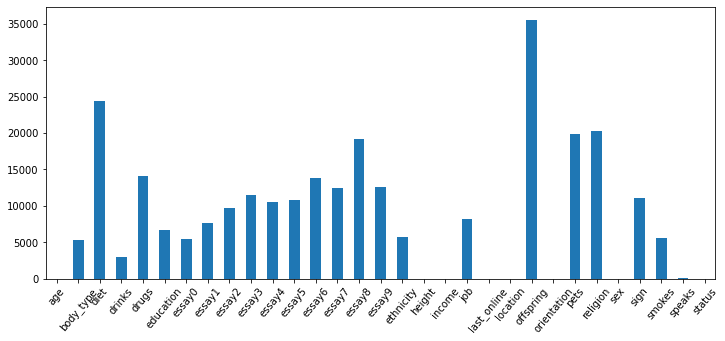

In [137]:
plt.figure(figsize=(12, 5))
copy_data.isnull().sum().plot(kind='bar')
plt.xticks(rotation=50)
plt.show()

In [138]:
data.sex.value_counts()

m    35829
f    24117
Name: sex, dtype: int64

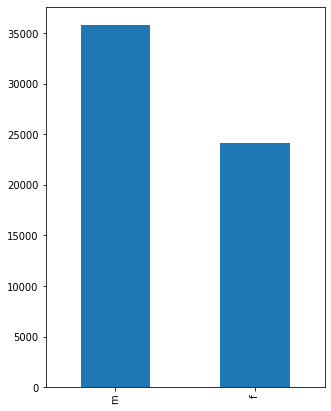

In [139]:
plt.figure(figsize=(5,7))
data.sex.value_counts().plot(kind='bar')
plt.show()

In [140]:
min(data.age)

18

In [141]:
data['18-25']=data['age'].apply(lambda x: 'Yes' if x <= 25 else 'No')

In [142]:
data['26-35']=data['age'].apply(lambda x: 'Yes' if x <= 35 and x > 25 else 'No')

In [143]:
data['36-45']=data['age'].apply(lambda x: 'Yes' if x <= 45 and x > 35 else 'No')

In [144]:
data['45-above']=data['age'].apply(lambda x: 'Yes' if x > 45 else 'No')

In [145]:
data['18-25'].value_counts()

No     45492
Yes    14454
Name: 18-25, dtype: int64

In [146]:
data['26-35'].value_counts()

No     31325
Yes    28621
Name: 26-35, dtype: int64

In [147]:
data['36-45'].value_counts()

No     49143
Yes    10803
Name: 36-45, dtype: int64

In [148]:
data['45-above'].value_counts()

No     53878
Yes     6068
Name: 45-above, dtype: int64

In [149]:
age1 = [x for x in data['18-25'] if x == 'Yes']

In [150]:
age2 = [x for x in data['26-35'] if x == 'Yes']

In [151]:
age3 = [x for x in data['36-45'] if x == 'Yes']

In [152]:
age4 = [x for x in data['45-above'] if x == 'Yes']

In [153]:
dataPlot = {'18-25':len(age1), '26-25':len(age2), '36-45':len(age3),  
        '45-above':len(age4)} 
ageType = list(dataPlot.keys()) 
count = list(dataPlot.values())

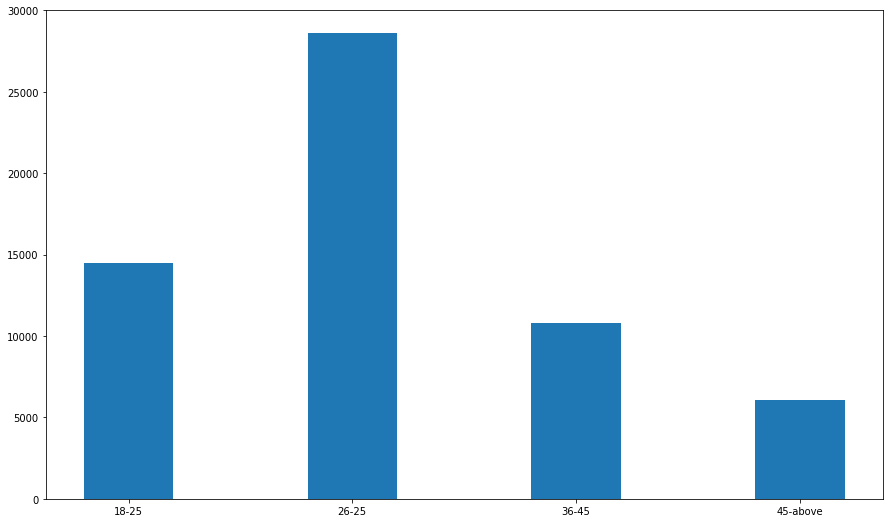

In [154]:
plt.figure(figsize=(15,9))
plt.bar(ageType, count, width = 0.4)
plt.show()

In [155]:
data.diet.nunique()

18

In [156]:
data.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status', '18-25',
       '26-35', '36-45', '45-above'],
      dtype='object')

In [157]:
data.drinks.unique()

array(['socially', 'often', 'not at all', 'rarely', None, 'very often',
       'desperately'], dtype=object)

In [171]:
drinksAge = {'18-25':data['18-25'], '26-35':data['26-35'], '36-45':data['36-45'],  
        '45-above':data['45-above']} 
  
drinksAge = pd.DataFrame(drinksAge) 

In [172]:
type(drinksAge)

pandas.core.frame.DataFrame

In [173]:
drinksAge['Socially'] = data['drinks'].apply(lambda x: 'Yes' if x == 'socially' else 'No')

In [174]:
drinksAge['often'] = data['drinks'].apply(lambda x: 'Yes' if x == 'often' else 'No')

In [175]:
drinksAge['not at all'] = data['drinks'].apply(lambda x: 'Yes' if x == 'not at all' else 'No')

In [176]:
drinksAge['rarely'] = data['drinks'].apply(lambda x: 'Yes' if x == 'rarely' else 'No')

In [177]:
drinksAge['None'] = data['drinks'].apply(lambda x: 'Yes' if x == 'None' else 'No')

In [178]:
drinksAge['very often'] = data['drinks'].apply(lambda x: 'Yes' if x == 'very often' else 'No')

In [179]:
drinksAge['desperately'] = data['drinks'].apply(lambda x: 'Yes' if x == 'desperately' else 'No')

In [180]:
drinksAge

,18-25,26-35,36-45,45-above,Socially,often,not at all,rarely,None,very often,desperately
0,Yes,No,No,No,Yes,No,No,No,No,No,No
1,No,Yes,No,No,No,Yes,No,No,No,No,No
2,No,No,Yes,No,Yes,No,No,No,No,No,No
3,Yes,No,No,No,Yes,No,No,No,No,No,No
4,No,Yes,No,No,Yes,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
59941,No,No,No,Yes,Yes,No,No,No,No,No,No
59942,Yes,No,No,No,No,Yes,No,No,No,No,No
59943,No,No,Yes,No,No,No,Yes,No,No,No,No
59944,No,Yes,No,No,Yes,No,No,No,No,No,No


In [191]:
sociallyYes = [x for x in drinksAge['Socially'] if x == 'Yes']
sociallyNo = [x for x in drinksAge['Socially'] if x == 'No']
oftenYes = [x for x in drinksAge['often'] if x == 'Yes']
oftenNo = [x for x in drinksAge['often'] if x == 'No']
notYes = [x for x in drinksAge['not at all'] if x == 'Yes']
notNo = [x for x in drinksAge['not at all'] if x == 'No']
rarelyYes = [x for x in drinksAge['rarely'] if x == 'Yes']
rarelyNo = [x for x in drinksAge['rarely'] if x == 'No']
NoneYes = [x for x in drinksAge['None'] if x == 'Yes']
NoneNo = [x for x in drinksAge['None'] if x == 'No']
veryoftenYes = [x for x in drinksAge['very often'] if x == 'Yes']
veryoftenNo = [x for x in drinksAge['very often'] if x == 'No']
desperatelyYes = [x for x in drinksAge['desperately'] if x == 'Yes']
desperatelyNo = [x for x in drinksAge['desperately'] if x == 'No']

<Figure size 1080x1080 with 0 Axes>

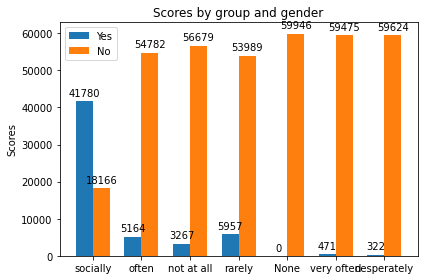

In [202]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['socially', 'often', 'not at all', 'rarely', 'None', 'very often',
       'desperately']
yesGroup = [len(sociallyYes), len(oftenYes), len(notYes), len(rarelyYes), len(NoneYes), len(veryoftenYes), len(desperatelyYes)]
noGroup =[len(sociallyNo), len(oftenNo), len(notNo), len(rarelyNo), len(NoneNo), len(veryoftenNo), len(desperatelyNo)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(15,15))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, yesGroup, width, label='Yes')
rects2 = ax.bar(x + width/2, noGroup, width, label='No')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [193]:
labels = data.drinks.unique()


In [194]:
labels

array(['socially', 'often', 'not at all', 'rarely', None, 'very often',
       'desperately'], dtype=object)